In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
%matplotlib notebook

In [110]:
def lc_plot(t, m, m_unc, period=0.0):
    if period == 0.0:
        fig, ax = plt.subplots()
        ax.errorbar(t, m, m_unc, 
                    fmt='o', color='MediumAquaMarine',
                    mec="0.2",mew=0.5)
        ax.set_xlabel('HJD (d)')
        ax.set_ylabel(r'$V_\mathrm{ASAS}\;(\mathrm{mag})$')
        fig.gca().invert_yaxis()
    elif period != 0.0:
        fig = plt.figure()
        gs = GridSpec.GridSpec(5, 1)
        ax_full = plt.subplot(gs[:2, :])
        ax_full.errorbar(t, m, m_unc, 
                         fmt='o', color='MediumAquaMarine',
                         mec="0.2",mew=0.5)
        ax_full.set_xlabel('HJD (d)')
        ax_full.set_ylabel(r'$V_\mathrm{ASAS}\;(\mathrm{mag})$')
        plt.gca().invert_yaxis()

        ax_phase = plt.subplot(gs[2:, :])
        for repeat in [-1, 0, 1]:
            ax_phase.errorbar(t/period % 1 + repeat, m, m_unc, 
                             fmt='o', color='MediumAquaMarine',
                             mec="0.2",mew=0.5)
        ax_phase.axvline(x=0, ls='--', color='0.8', lw=1, zorder=3)
        ax_phase.axvline(x=1, ls='--', color='0.8', lw=1, zorder=3)
        ax_phase.set_xlim(-0.2, 1.2)
        ax_phase.set_xlabel('Phase')
        ax_phase.set_ylabel(r'$V_\mathrm{ASAS}\;(\mathrm{mag})$')
        plt.gca().invert_yaxis()
    
    plt.tight_layout()

In [32]:
def read_lc(filename):
    hjd, mag, mag_unc = np.loadtxt(filename, unpack=True)
    return hjd, mag, mag_unc

<IPython.core.display.Javascript object>


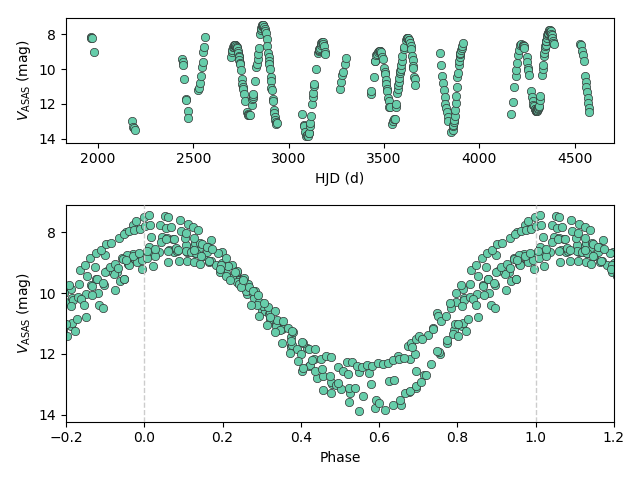

In [91]:
# Mira example
t, m, m_unc = read_lc("./training_lcs/181637+0341.6")
lc_plot(t, m, m_unc, period=150.461188)

<IPython.core.display.Javascript object>


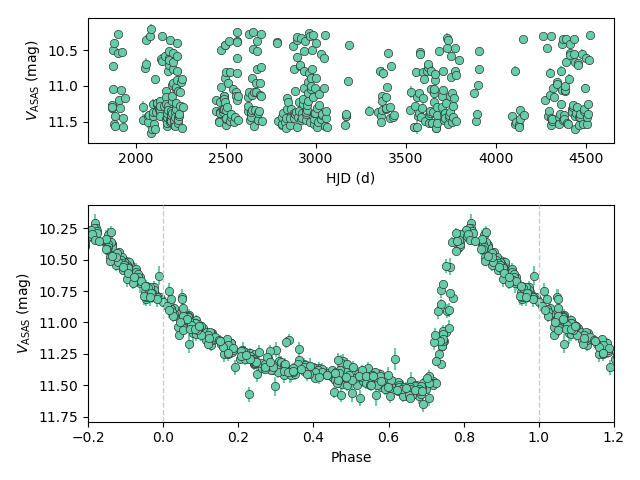

In [97]:
# RRL example
t, m, m_unc = read_lc("./training_lcs/011815-3912.8")
lc_plot(t, m, m_unc, period=0.510918)

<IPython.core.display.Javascript object>


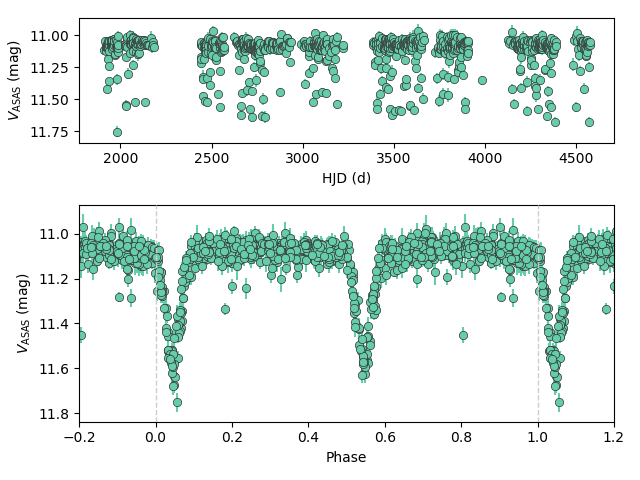

In [129]:
# dEB example
t, m, m_unc = read_lc("./training_lcs/153835-6727.8")
lc_plot(t, m, m_unc, period=2*1.107174)

<IPython.core.display.Javascript object>


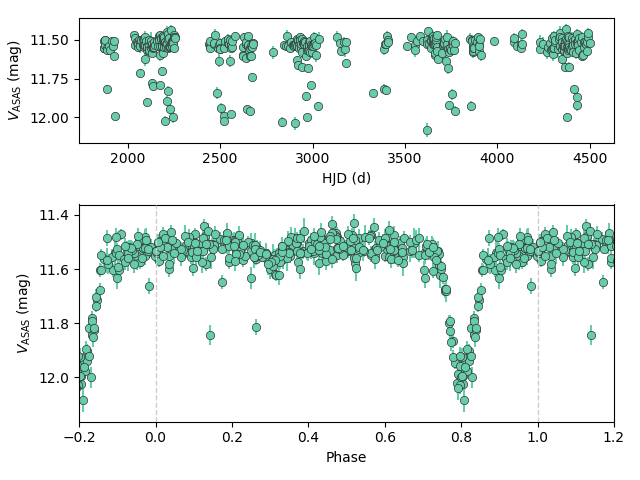

In [103]:
# dEB example
t, m, m_unc = read_lc("./test_lcs/235142-5260.0")
lc_plot(t, m, m_unc, period=1.364021)

<IPython.core.display.Javascript object>


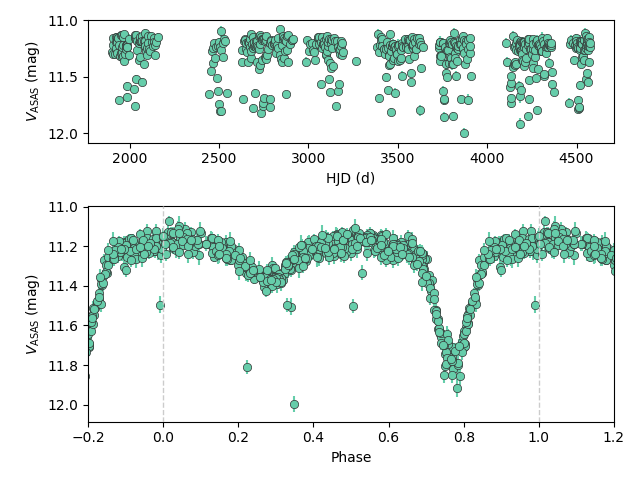

In [107]:
# aEB example
t, m, m_unc = read_lc("./training_lcs/141748-5311.2")
lc_plot(t, m, m_unc, period=1.514158)

193546-1136.3	W_Ursae_Maj	0.424015

<IPython.core.display.Javascript object>


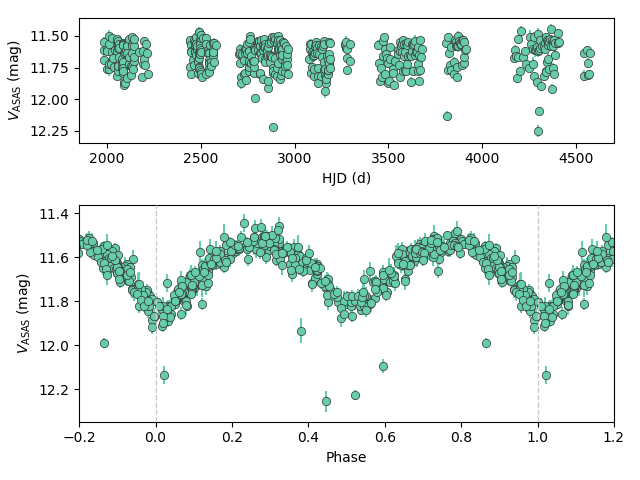

In [116]:
# WU example
t, m, m_unc = read_lc("./training_lcs/193546-1136.3")
lc_plot(t, m, m_unc, period=0.424015)

<IPython.core.display.Javascript object>


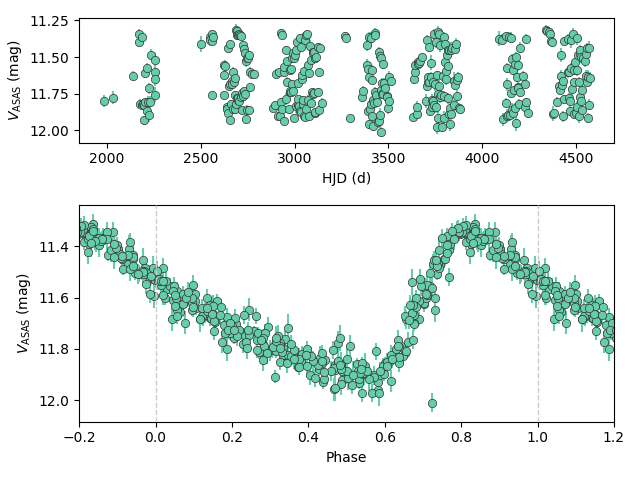

In [112]:
# Cepheid example
t, m, m_unc = read_lc("./training_lcs/065640+0011.4")
lc_plot(t, m, m_unc, period=4.022837)

<IPython.core.display.Javascript object>


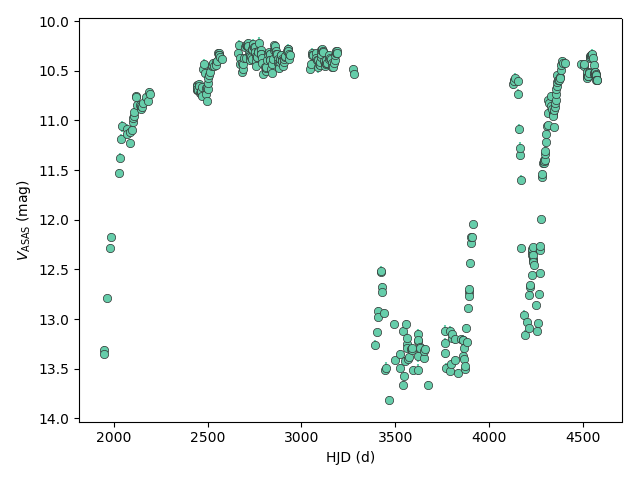

In [96]:
# R Cor Bor example
t, m, m_unc = read_lc("./training_lcs/163242-5315.6")
lc_plot(t, m, m_unc, period=0.0)

### Feature calculation

In [63]:
def calc_feature(df, train=True):
    
    if train==True:
        lc_dir = "./training_lcs/"
    else:
        lc_dir = "./test_lcs/"
    
    feature = np.empty(len(df))
    for source_num, asas_id in enumerate(df["ASAS_ID"]):
        t, m, mu = read_lc(lc_dir+asas_id)
        # feature calculations
        # feature calculations
        # feature calculations
        
        feature[source_num] = feat_val
    
    return feature

### CV Testing of Features

In [144]:
train_df = pd.read_csv("training_sources.csv")

X_train = np.array(train_df[["mean", "nobs", "duration"]])
y_train = np.array(train_df["Class"])

In [145]:
def calc_cv_score(X, y):
    rf_clf = RandomForestClassifier(n_estimators=150, min_samples_leaf=1)
    
    cv_score = cross_val_score(rf_clf, X, y, cv=10, n_jobs=-1)
    
    print("These features have CV accuracy = {:.4f} +/- {:.4f}".format(np.mean(cv_score), np.std(cv_score, ddof=1)))

In [146]:
calc_cv_score(X_train, y_train)

/Users/adamamiller/miniconda3/envs/DSFP/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


These features have CV accuracy = 0.4441 +/- 0.0443
